In [19]:
import os
import numpy as np
from highway_env.ngsim_utils.trajectory_gen import (
    process_raw_trajectory,
    first_valid_index,
)

episode_root = "highway_env/data/processed_10s"

scene =  "us-101"
prebuilt_dir = os.path.join(episode_root, scene, "prebuilt")

traj_path = os.path.join(prebuilt_dir, f"trajectory_train.npy")

traj_all_by_episode  = np.load(traj_path, allow_pickle=True).item()

In [20]:
episode_name="t1118849019700"
ego_id = 538
traj_all = traj_all_by_episode[episode_name]
traj_set = {"ego": traj_all[ego_id]}
for vid, meta in traj_all.items():
    if vid == ego_id:
        continue
    traj_set[vid] = meta
trajectory_set = traj_set


In [24]:

ego_traj_full = traj_set["ego"]["trajectory"]


In [25]:
ego_traj_full

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [ 37.37633211,  74.56661124,  25.78741389,   4.        ],
       [ 37.36481517,  76.9232044 ,  25.03802936,   4.        ],
       [ 37.35223316,  79

/tmp/ipykernel_9422/2907964931.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(trajectory_set))


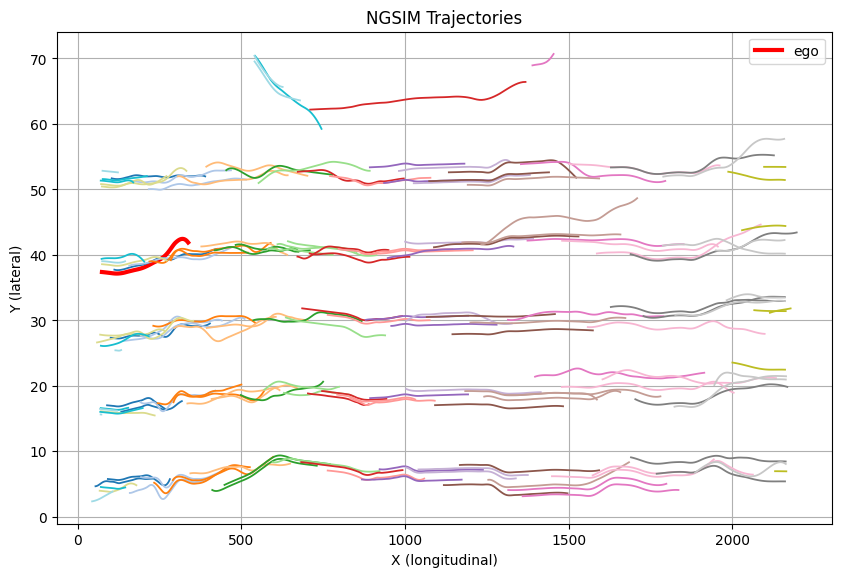

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plot_all_trajectories(trajectory_set, ego_key="ego", x_to_y_scale=20):
    plt.figure(figsize=(10, 10))

    cmap = plt.cm.get_cmap("tab20", len(trajectory_set))

    for i, (vid, meta) in enumerate(trajectory_set.items()):
        traj = meta["trajectory"]

        mask = ~((traj[:,0] == 0) & (traj[:,1] == 0))
        if mask.sum() == 0:
            continue

        traj = traj[mask]

        xs = traj[:, 1]
        ys = traj[:, 0]

        if vid == ego_key:
            plt.plot(xs, ys, linewidth=3, color="red", label="ego")
            continue

        plt.plot(xs, ys, linewidth=1.3, color=cmap(i))

    plt.xlabel("X (longitudinal)")
    plt.ylabel("Y (lateral)")
    plt.title("NGSIM Trajectories")

    # Key line: NON-EQUAL ASPECT
    plt.gca().set_aspect(x_to_y_scale)

    plt.grid(True)
    plt.legend()
    plt.show()


plot_all_trajectories(trajectory_set)
